In [1]:
import argparse
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
import os

import torch
from torch.backends import cudnn
import torchvision.transforms as transforms

import network
from optimizer import restore_snapshot
from datasets import cityscapes
from config import assert_and_infer_cfg

parser = argparse.ArgumentParser(description='demo')
# parser.add_argument('--demo-image', type=str, default='', help='path to demo image', required=True)
parser.add_argument('--snapshot', type=str, default='./pretrained_models/cityscapes_best_wideresnet38.pth', help='pre-trained checkpoint', required=True)
parser.add_argument('--arch', type=str, default='network.deepv3.DeepWV3Plus', help='network architecture used for inference')
# parser.add_argument('--save-dir', type=str, default='./save', help='path to save your results')
args = parser.parse_args(args=['--arch', 'network.deepv3.DeepWV3Plus', '--snapshot', 'ckpts/cityscapes_best.pth'])
assert_and_infer_cfg(args, train_mode=False)
cudnn.benchmark = True

Using regular batch norm


In [2]:
# get net
args.dataset_cls = cityscapes
net = network.get_net(args, criterion=None)
net = torch.nn.DataParallel(net).cuda()
print('Net built.')
net, _ = restore_snapshot(net, optimizer=None, snapshot=args.snapshot, restore_optimizer_bool=False)
net.eval()
print('Net restored.')

=====================Could not load ImageNet weights=======================
Please download the ImageNet weights of WideResNet38 in our repo to ./pretrained_models.
Net built.
Net restored.


In [82]:
image_path = '/home/ubuntu/hdd/data/Cityscapes/leftImg8bit_sequence_trainvaltest/leftImg8bit_sequence/' + \
             'val/frankfurt/frankfurt_000000_013942_leftImg8bit.png'

# get data
mean_std = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
img_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(*mean_std)])
img = Image.open(image_path)
img_tensor = img_transform(img)

# label = Image.open(image_path.replace('leftImg8bit', 'gtFine')[:-4]+'_color.png').convert('RGB')

# predict
t = time.time()
with torch.no_grad():
    pred = net(img_tensor.unsqueeze(0).cuda())
    torch.cuda.synchronize()
print(time.time()-t)
    
pred = pred.cpu().numpy().squeeze()

colorized = args.dataset_cls.colorize_mask(np.argmax(pred, axis=0))

1.1864783763885498


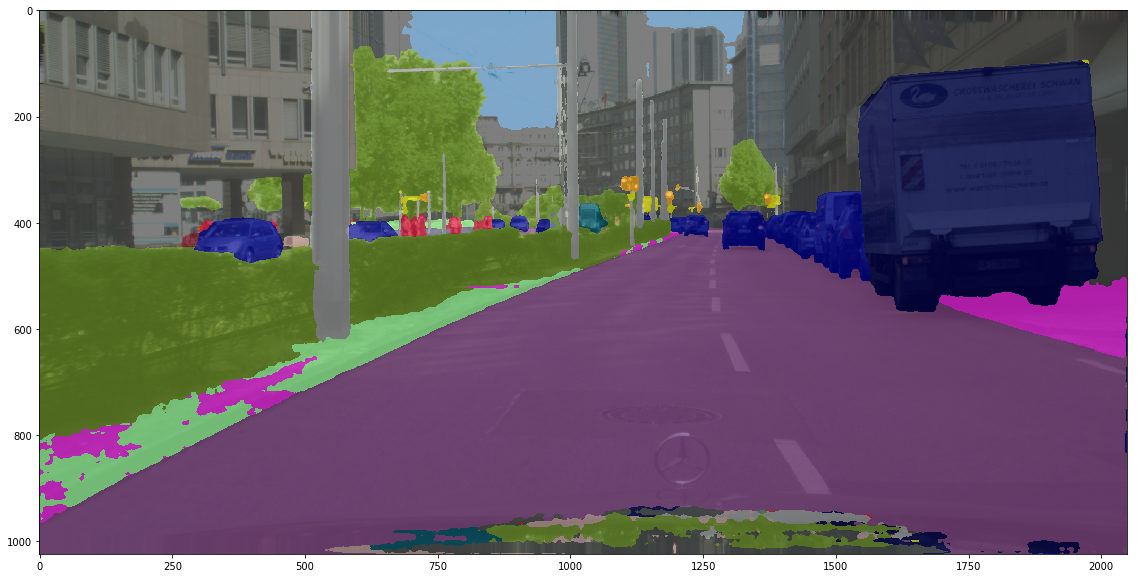

In [79]:
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.imshow(colorized, alpha=0.7)

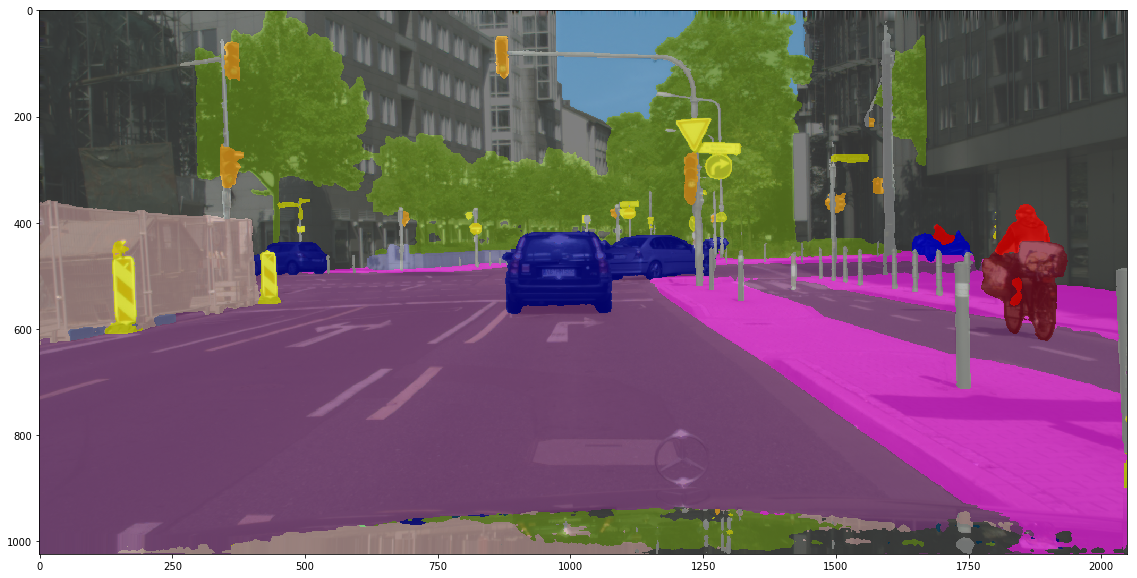

In [83]:
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.imshow(colorized, alpha=0.7)
# plt.figure(figsize=(20, 10))
# plt.imshow(label)

In [ ]:
directory = sorted(os.listdir('/home/ubuntu/hdd/data/Cityscapes/leftImg8bit_sequence_trainvaltest/leftImg8bit_sequence/val/frankfurt'))
for i, image_path in enumerate(directory):
    # get data
    mean_std = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    img_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(*mean_std)])
    img = Image.open(os.path.join('/home/ubuntu/hdd/data/Cityscapes/leftImg8bit_sequence_trainvaltest/leftImg8bit_sequence/val/frankfurt', image_path))
    img_tensor = img_transform(img)

    with torch.no_grad():
        pred = net(img_tensor.unsqueeze(0).cuda())
        torch.cuda.synchronize()

    pred = pred.cpu().numpy().squeeze()

    colorized = args.dataset_cls.colorize_mask(np.argmax(pred, axis=0))
    res = cv2.addWeighted(np.array(img), 0.3, np.array(colorized.convert('RGB')), 0.7, 0)
    cv2.imwrite('results/%06d.png'%i, res[:,:,::-1])
    print('\r', i, end=' '*10)



0it [00:00, ?it/s]

1it [00:01,  1.46s/it]

2it [00:02,  1.47s/it]

3it [00:04,  1.48s/it]

4it [00:05,  1.49s/it]

5it [00:07,  1.49s/it]

6it [00:08,  1.50s/it]

7it [00:10,  1.51s/it]

8it [00:12,  1.51s/it]

9it [00:13,  1.51s/it]

10it [00:15,  1.50s/it]

11it [00:16,  1.51s/it]

12it [00:18,  1.51s/it]

13it [00:19,  1.52s/it]

14it [00:21,  1.53s/it]

15it [00:22,  1.55s/it]

16it [00:24,  1.54s/it]

17it [00:25,  1.55s/it]

18it [00:27,  1.56s/it]

19it [00:28,  1.55s/it]

20it [00:30,  1.56s/it]

21it [00:32,  1.56s/it]

22it [00:33,  1.56s/it]

23it [00:35,  1.56s/it]

24it [00:36,  1.56s/it]

25it [00:38,  1.55s/it]

26it [00:39,  1.55s/it]

27it [00:41,  1.56s/it]

28it [00:42,  1.55s/it]

29it [00:44,  1.54s/it]

30it [00:46,  1.56s/it]

31it [00:47,  1.54s/it]

32it [00:49,  1.54s/it]

33it [00:50,  1.55s/it]

34it [00:52,  1.54s/it]

35it [00:53,  1.53s/it]

36it [00:55,  1.53s/it]

37it [00:56,  1.53s/it]

38it [00:58,  1.54s/it]

39it [00:59,  1.56s/it]

40it [01:01,